<a href="https://colab.research.google.com/github/gilcesarf/imd3002-202502/blob/main/Aula05/Exercicios_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup inicial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# Download the raw CSV data directly from GitHub

url = "https://raw.githubusercontent.com/gilcesarf/imd3002-202502/main/Aula05/data/Adult.csv"

dataset = pd.read_csv(url, encoding='utf-8')

# Características da Base de Dados


In [2]:
# caracteristicas da base de dados
print( "Arquivo em processamento: Adult.csv")
print( "Caracteristicas da Base de Dados:" )

dataset.info()

Arquivo em processamento: Adult.csv
Caracteristicas da Base de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


# Verificação de Missing Values


In [3]:
# verificacao de missing values
missing = dataset.isnull().sum()
print( "Missing Values:" )
print( missing )


Missing Values:
age                 0
workclass         963
fnlwgt              0
education           1
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64


# Modas e Valores unicos

In [4]:
modas = dataset.mode()
print("modas")
print(modas)

print("\ndataset['workclass'].unique()=", dataset['workclass'].unique())

print("\ndataset['native-country'].unique()=", dataset['native-country'].unique())

print("\ndataset['occupation'].unique()=", dataset['occupation'].unique())

print("\ndataset['education'].unique()=", dataset['education'].unique())

modas
   age workclass  fnlwgt education  education-num      marital-status  \
0   35   Private  136986   HS-grad              9  Married-civ-spouse   

       occupation relationship   race   sex  capital-gain  capital-loss  \
0  Prof-specialty      Husband  White  Male             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  

dataset['workclass'].unique()= ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

dataset['native-country'].unique()= ['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Gua

# Limpeza de Missing Values para 'workclass', 'occupation' e 'native-country'
#### utilização de substituição pela moda

In [5]:
atributos = ['workclass', 'occupation', 'native-country']
dataset[atributos] = dataset[atributos].fillna(modas.loc[0, atributos])

dados = dataset[atributos].value_counts(dropna=False)

print("dataset.isnull().sum()=\n")
print(dataset.isnull().sum())

dataset.isnull().sum()=

age               0
workclass         0
fnlwgt            0
education         1
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


# Limpeza de Missing Values para 'education'
#### utilização de descarte

In [6]:

dataset.dropna(subset=['education'], inplace=True)

print("dataset.isnull().sum()=\n")
print(dataset.isnull().sum())

dataset.isnull().sum()=

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


# Transformação de Atributos Numéricos

## Eliminando coluna fnlwgt

Se elimina a coluna pois ela representa o peso da amostragem na população total (segundo o Census) e pode introduzir ruído nas análises de ML

In [7]:
dataset = dataset.drop(columns=['fnlwgt'])

## Analisando Outliers



In [8]:
dataset_outliers = dataset.copy()

atributos = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

parametros_boxplot = {}
outliers_substituidos = {}

# para cada coluna de interesse
for col in atributos:

  # calcula limites para boxplot
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3 - Q1

  lim_inf = Q1 - 1.5 * IQR
  lim_sup = Q3 + 1.5 * IQR

  # calcula mediana da coluna
  mediana = dataset[col].median()

  # contagem dos outliers
  mask = (dataset[col] < lim_inf) | (dataset[col] > lim_sup)
  outliers_substituidos[col] = int(mask.sum())

  #substituicao dos outliers no dataset auxiliar pelas medianas
  dataset_outliers.loc[mask, col] = mediana

  # armazena parametros do boxplot para acesso posterior
  parametros_boxplot[col] = {
      "Q1": Q1,
      "Q3": Q3,
      "IQR": IQR,
      "lim_inf": lim_inf,
      "lim_sup": lim_sup,
      "mediana": mediana,
      "mascara": mask
  }


# cria dataframes para impressao
outliers_df = pd.DataFrame(
    {
    "Coluna": list(outliers_substituidos.keys()),
    "Outliers": list(outliers_substituidos.values())
    }
).sort_values("Outliers", ascending=False)

outliers_df["% do total"] = outliers_df["Outliers"] / len(dataset) * 100

# mostra quantidade de outliers
print(outliers_df)


           Coluna  Outliers  % do total
3  hours-per-week      4488   27.567568
1    capital-gain      1322    8.120393
2    capital-loss       763    4.686732
0             age        73    0.448403


### Comparação grafica - age

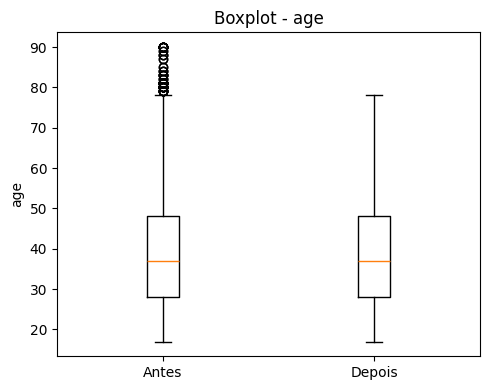

  Coluna  Outliers  % do total
0    age        73    0.448403


In [9]:
col = 'age'
fig, ax = plt.subplots(figsize=(5, 4))
ax.boxplot(
    [dataset[col], dataset_outliers[col]],
    tick_labels=["Antes", "Depois"]
)
ax.set_title(f"Boxplot - {col}")
ax.set_ylabel(col)
plt.tight_layout()
plt.show()
# mostra quantidade de outliers
print(outliers_df[outliers_df["Coluna"] == col])

Vemos que menos de 1% dos valores seriam substituídos, o que é totalmente aceitável. Embora estudar a faixa etária em particular possa ser interessante, talvez seja possivel suavizar os dados aplicando substituição dos outliers. Mas me pergunto se seria adequado ocupar a mediana nesse caso. Me parece que o mais adequado seria substituir pelo limite superior do boxplot.

### Comparação grafica - capital-gain

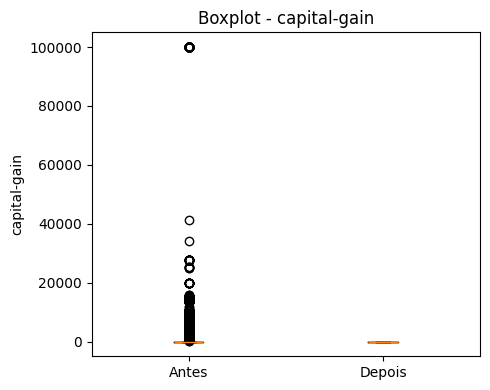

         Coluna  Outliers  % do total
1  capital-gain      1322    8.120393


In [10]:
col = 'capital-gain'
fig, ax = plt.subplots(figsize=(5, 4))
ax.boxplot(
    [dataset[col], dataset_outliers[col]],
    tick_labels=["Antes", "Depois"]
)
ax.set_title(f"Boxplot - {col}")
ax.set_ylabel(col)
plt.tight_layout()
plt.show()
# mostra quantidade de outliers
print(outliers_df[outliers_df["Coluna"] == col])

Vemos que seriam substituidos 8% do total, o que é um valor significativo mas ainda aceitável. Entrentanto, vemos que perdemos completamente a informação associada a esse atributo, pois todos os valores interessantes são subsituidos pela mediana (nesse caso zero). Logo, me parece não ser uma boa idéia fazer essa substituição.

### Comparação grafica - capital-loss

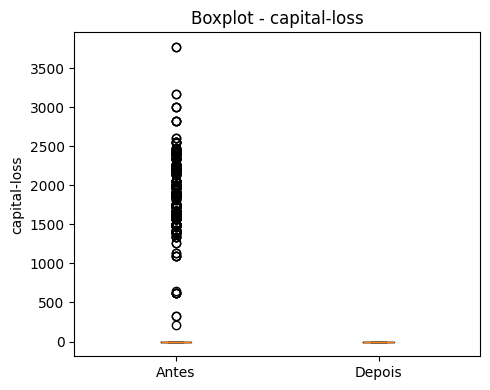

         Coluna  Outliers  % do total
2  capital-loss       763    4.686732


In [11]:
col = 'capital-loss'
fig, ax = plt.subplots(figsize=(5, 4))
ax.boxplot(
    [dataset[col], dataset_outliers[col]],
    tick_labels=["Antes", "Depois"]
)
ax.set_title(f"Boxplot - {col}")
ax.set_ylabel(col)
plt.tight_layout()
plt.show()
# mostra quantidade de outliers
print(outliers_df[outliers_df["Coluna"] == col])

Da mesma forma que no atributo capital-gain, vemos que as substituições são relativamente aceitaveis do ponto de vista quantitativo, mas ocorre o mesmo fenômeno anterior. Logo, também me parece não ser uma boa idéia fazer essa substituição.

### Comparação grafica - hours-per-week

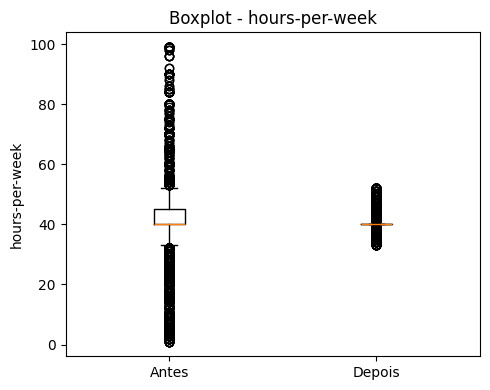

           Coluna  Outliers  % do total
3  hours-per-week      4488   27.567568


In [12]:
col = 'hours-per-week'
fig, ax = plt.subplots(figsize=(5, 4))
ax.boxplot(
    [dataset[col], dataset_outliers[col]],
    tick_labels=["Antes", "Depois"]
)
ax.set_title(f"Boxplot - {col}")
ax.set_ylabel(col)
plt.tight_layout()
plt.show()
# mostra quantidade de outliers
print(outliers_df[outliers_df["Coluna"] == col])

Diferente dos dois atributos anteriores, vemos que 27% dos valores seriam substituitos, ou seja, quase 1/3 dos valores seriam substituídos. Além do aspecto numérico, observando o aspecto qualitativo da informação associada ao atributo, me parece que o numero de horas trabalhadas por semana são dados relevantes. Considerando que a origem dos dados é de uma base estatística real, creio que não podemos aceitar tamanha mudança nos dados.

### Outliers - conclusão
Vamos aplicar apenas a substituição de outliers para o atributo "age", mas vamos utilizar o valor do limite superior ao inves da mediana.

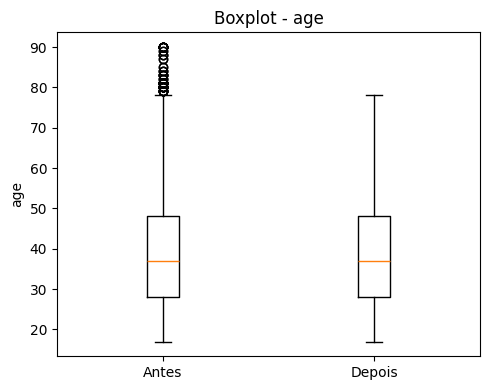

  Coluna  Outliers  % do total
0    age        73    0.448403
Limite superior:  78.0

dataset['age'].unique()= [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78]


In [13]:
col = 'age'
dataset_outliers.loc[parametros_boxplot[col]["mascara"], col] = parametros_boxplot[col]["lim_sup"]

fig, ax = plt.subplots(figsize=(5, 4))
ax.boxplot(
    [dataset[col], dataset_outliers[col]],
    tick_labels=["Antes", "Depois"]
)
ax.set_title(f"Boxplot - {col}")
ax.set_ylabel(col)
plt.tight_layout()
plt.show()
# mostra quantidade de outliers
print(outliers_df[outliers_df["Coluna"] == col])

# substitui definitivamente os outliers de "age"
dataset.loc[parametros_boxplot[col]["mascara"], col] = parametros_boxplot[col]["lim_sup"]

#e agora comprovamos que não existem mais valores outliers
print("Limite superior: ", parametros_boxplot[col]["lim_sup"])
print("\ndataset['age'].unique()=", np.sort(dataset[col].unique()))

# Transformação de Atributos Discretos

In [14]:
# transformacao de atributos numericos
dataset.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K


In [15]:
# Transformação de atributos discretos

## Analisando colunas categoricas

In [16]:
# Obtendo os nomes das colunas Categóricas
tipos_categoricos = ['object']
vetor_categoricos = dataset.select_dtypes(include=tipos_categoricos)

print("\n")
for atributo in vetor_categoricos:
  print(dataset[atributo].value_counts())
  print()



workclass
Private             12172
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: count, dtype: int64

education
HS-grad         5283
Some-college    3586
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: count, dtype: int64

marital-status
Married-civ-spouse       7402
Never-married            5434
Divorced                 2190
Widowed                   525
Separated                 505
Married-spouse-absent     210
Married-AF-spouse          14
Name: count, dtype: int64

occupation
Prof-specialty       2998
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical 

Observamos que para todos os atributos categoricos, exceção feita a 'native-country', não existem contagens com repetições. Portanto, para esses, vamos utilizar a técnicao de "Count Encoding".

## Count Encoding

In [17]:
for col in vetor_categoricos.columns:
  if col != "native-country":  # exceção feita para native-country por que existem repetições na contagem.
    # contar frequências
    counts = dataset[col].value_counts()
    # mapear categorias -> contagem
    dataset[col] = dataset[col].map(counts)

## Tratamento para Native Country

Observamos que native-country apresenta repetições da frequência de elementos. Entretanto, essas repetições aparecem em elementos cuja frequencia é muito baixa, com pouca representatividade em relação ao total de elementos. Em particular, vemos que se tomamos as frequencias ordenenadas para o atributo, as repetições aparecem somente abaixo da frequencia 30, Japao e Portugal, e inferiores. A soma percentual de elementos cuja frequência é menor ou igual a 30 é de cerca de 2,3% do total de elementos. Logo, quero aplicar uma adaptação da técnica de count-encoding. A idéia é utilizar count-encoding para todos os elementos cuja frequência seja maior a 30. E para os elementos cuja frequência seja menor ou igual a 30, vamos agrupar-los dentro de um mesmo conjunto, "outros", e estabelecer a contagem desses elementos de forma conjunta.

In [18]:
col = "native-country"
limiar = 30  # frequências <= 30 viram "outros"

# contagens por categoria
counts = dataset[col].value_counts()

# separa frequentes vs raras
freq_altas = counts[counts > limiar]
freq_baixas = counts[counts <= limiar]

# total conjunto para categorias raras
outros_total = int(freq_baixas.sum())

# mapeamento final
mapping = freq_altas.to_dict()
for c in freq_baixas.index:
    mapping[c] = outros_total

# sobrescreve a coluna original com o encoding adaptado
dataset[col] = dataset[col].map(mapping)

# Normalização

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16280 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16280 non-null  int64
 1   workclass       16280 non-null  int64
 2   education       16280 non-null  int64
 3   education-num   16280 non-null  int64
 4   marital-status  16280 non-null  int64
 5   occupation      16280 non-null  int64
 6   relationship    16280 non-null  int64
 7   race            16280 non-null  int64
 8   sex             16280 non-null  int64
 9   capital-gain    16280 non-null  int64
 10  capital-loss    16280 non-null  int64
 11  hours-per-week  16280 non-null  int64
 12  native-country  16280 non-null  int64
 13  class           16280 non-null  int64
dtypes: int64(14)
memory usage: 1.9 MB


## Aplicando minmax_scale

In [20]:
# Obtendo os nomes das colunas Numéricas
tipos_numericos = ['int64', 'int64', 'int64', 'int64', 'int64']
cols_num = dataset.select_dtypes(include=tipos_numericos)

## selecionando as colunas
colunas_numericas = list(cols_num.columns)

# Copiando os dados e aplicando a normalizacao
dataset_normalizado = dataset.copy()
dataset_normalizado[colunas_numericas] = dataset[colunas_numericas].apply(minmax_scale)

# Visualização dos dados normalizados
dataset_normalizado.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.131148,1.000000,0.115216,0.400000,0.733622,0.338570,0.331499,0.103179,1.0,0.000000,0.0,0.397959,1.0,1.0
1,0.344262,1.000000,1.000000,0.533333,1.000000,0.163770,1.000000,1.000000,1.0,0.000000,0.0,0.500000,1.0,1.0
2,0.180328,0.085463,0.095601,0.733333,1.000000,0.109626,1.000000,1.000000,1.0,0.000000,0.0,0.397959,1.0,0.0
4,0.016393,1.000000,0.676823,0.600000,0.733622,1.000000,0.331499,1.000000,0.0,0.000000,0.0,0.295918,1.0,1.0
5,0.278689,1.000000,0.080747,0.333333,0.733622,0.542112,0.625813,1.000000,1.0,0.000000,0.0,0.295918,1.0,1.0
6,0.196721,1.000000,1.000000,0.533333,0.733622,1.000000,0.192430,0.103179,1.0,0.000000,0.0,0.397959,1.0,1.0
7,0.754098,0.108308,0.043039,0.933333,1.000000,1.000000,1.000000,1.000000,1.0,0.031030,0.0,0.316327,1.0,0.0
8,0.114754,1.000000,0.676823,0.600000,0.733622,0.542112,0.192430,1.000000,0.0,0.000000,0.0,0.397959,1.0,1.0
9,0.622951,1.000000,0.052752,0.200000,1.000000,0.670789,1.000000,1.000000,1.0,0.000000,0.0,0.091837,1.0,1.0
10,0.786885,1.000000,1.000000,0.533333,1.000000,0.338570,1.000000,1.000000,1.0,0.064181,0.0,0.397959,1.0,0.0


# Salvando resultado em CSV

In [21]:
dataset.to_csv("Adult_normalizado.csv", index=False)